In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd

데이터 분석을 하기 위해 가장 먼저 해야 할 일은 데이터를 불러오는 일이다. => 불러온 데이터를 데이터 집합(set)이라고 한다.

In [2]:
# read_csv() 함수로 갭마인더 데이터 집합을 불러와서 데이터프레임으로 리턴한다.
# read_csv() 함수는 기본적으로 ','로 구분된 csv 데이터를 불러오기 때문에 tab으로 구분된 tsv 데이터는 sep 옵션에 '\t'를 지정해서
# 불러와야 한다.
gapminder_df = pd.read_csv('./data/gapminder.tsv', sep='\t')
print(type(gapminder_df))
gapminder_df
# country: 국가, continent: 대륙, year: 년도, lifeExp: 평균수명, pop: 인구수, gdpPercap: 1인 GDP

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
# 판다스의 head() 함수로 데이터프레임의 앞쪽 데이터를 지정한 개수만큼 얻어온다. => 기본값은 5개
gapminder_df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [4]:
# 판다스의 tail() 함수로 데이터프레임의 앞쪽 데이터를 지정한 개수만큼 얻어온다. => 기본값은 5개
gapminder_df.tail(3)

,country,continent,year,lifeExp,pop,gdpPercap
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [5]:
# 판다스의 shape 속성은 데이터프레임이 가지고 있는 데이터의 행과 열에 대한 정보를 저장하고 있다.
print(gapminder_df.shape)
print(gapminder_df.shape[0]) # shape[0]은 데이터프레임의 행의 개수를 저장하고 있다. => 데이터의 개수
print(gapminder_df.shape[1]) # shape[0]은 데이터프레임의 열의 개수를 저장하고 있다.
# 판다스의 columns 속성은 데이터프레임을 구성하는 열(필드, 속성, 변수)이름을 저장하고 있다.
print(gapminder_df.columns)

(1704, 6)
1704
6
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [6]:
# 판다스의 dtypes 속성은 데이터프레임을 구성하고 있는 데이터의 자료형을 확인할 수 있다. object => 문자열
print(gapminder_df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [7]:
# 판다스의 info() 함수를 사용하면 dtypes 속성을 사용한 것 보다 조금 더 자세한 내용을 확인할 수 있다.
print(gapminder_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


열 단위 데이터 추출하기

In [8]:
# 데이터프레임에서 데이터를 열 단위로 추출하려면 대괄호와 열 이름을 사용하며 추출한 열은 변수에 저장해서 사용한다.
# 1개의 열만 추출하면 시리즈를 얻을 수 있다.
country_df = gapminder_df['country'] # 데이터프레임에서 1개의 열만 얻어오려면 열 이름만 사용하면 된다.
print(type(country_df))
print(country_df.head(3))
print(country_df.tail(3))

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
Name: country, dtype: object
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [9]:
# 2개 이상의 열을 추출하면 데이터프레임으로 얻어올 수 있다.
# 데이터프레임에서 1개의 열만 얻어오려면 []안에 열 이름만 적어주면 되지만 2개 이상의 열을 얻어오려면 []안에 반드시 리스트 
# 형태로 열 이름을 적어야 한다.
sub_set = gapminder_df[['country', 'continent', 'year']]
print(type(sub_set))

<class 'pandas.core.frame.DataFrame'>


In [10]:
sub_set.head(3)

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962


In [11]:
sub_set.tail(3)

,country,continent,year
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002
1703,Zimbabwe,Africa,2007


행 단위 데이터 추출하기  
loc는 인덱스를 기준으로 행 단위 데이터를 추출하고 iloc는 행 번호를 기준으로 행 단위 데이터를 추출한다.

In [12]:
# head() 함수를 실행했을 때 맨 왼쪽에 보이는 숫자가 인덱스를 의미하고 행 번호는 데이터의 순서를 의미한다.
gapminder_df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [13]:
# loc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위의 데이터를 추출할 수 있고 버위를 벗어나는 -1이나 1704와 같이 인덱스를
# 지정하면 에러가 발생된다.
print(gapminder_df.loc[0])
print(gapminder_df.loc[1703])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [14]:
# 마지막 데이터 추출하기
# shape[0]에 전체 행의 개수가 저장되어 있는 것을 이용한다.
# print(gapminder_df.loc[-1]) # 에러, loc는 음수 인덱싱이 지원되지 않는다.
print(gapminder_df.shape[0])
print(gapminder_df.loc[gapminder_df.shape[0] - 1])
# tail() 함수를 이용한다.
print(gapminder_df.tail(1))

1704
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [18]:
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 인덱스를 담아서 loc로 넘겨주면 된다.
print(gapminder_df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [ ]:
# iloc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위의 데이터를 추출할 수 있고 1704와 같이 범위를 벗어나는 행 번호를 사용하면
# 에러가 발생된다.
# iloc는 음수를 지정하면 뒤 부터 역순으로 행 단위의 데이터를 추출할 수 있다. 음수 인덱싱을 지원한다.

In [22]:
print(gapminder_df.iloc[0])
print(gapminder_df.iloc[1703])
print(gapminder_df.iloc[-1])
print(gapminder_df.iloc[[0, 99, 999]])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


loc와 iloc를 자유자재로 사용하려면 추출할 데이터의 행과 열을 지정하는 방법을 알아야 한다.  
데이터프레임.loc[행, 열], 데이터프레임.iloc[행, 열] 방법을 사용하며 행과 열은 슬라이싱이나 range() 함수를 사용하는 방법이 있다.

In [23]:
# 슬라이싱
# 모든 행(':')의 데이터에 대해 country, year, pop 열을 추출한다.

In [27]:
# loc는 열을 추출할 때 열 이름을 지정해서 얻어온다.
sub_set = gapminder_df.loc[:, ['country', 'year', 'pop']]
sub_set.head(3)

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


In [29]:
# iloc는 열을 추출할 때 열 이름을 지정하면 에러가 발생된다.
# sub_set = gapminder_df.iloc[:, ['country', 'year', 'pop']] # 에러
# sub_set.head(3)

In [30]:
# iloc는 열을 추출할 때 열 인덱스를 지정해서 얻어온다.
sub_set = gapminder_df.iloc[:, [0, 2, 4]]
sub_set.head(3)

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


In [32]:
# loc는 열을 추출할 때 열 인덱스를 지정하면 에러가 발생된다.
# sub_set = gapminder_df.loc[:, [0, 2, 4]] # 에러
# sub_set.head(3)

range() 함수

In [38]:
# range() 함수는 초기치 부터 최종치를 넘어가지 않을 때 까지 증가치 만큼 증가하는 숫자 리스트를 만든다.
# range([초기치, ]최종치[, 증가치])
# 초기치가 생략되면 0이 증가치가 생략되면 1이 기본값으로 사용된다.
# range(10)와 range(0, 10)와 range(0, 10, 1)은 같은 표현이다.
print(range(10))
print(list(range(0, 10, 1)))

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [40]:
sub_set = gapminder_df.iloc[:, range(5)]
sub_set.head(3)

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083


In [41]:
sub_set = gapminder_df.iloc[:, range(3, 6)]
sub_set.head(3)

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710


In [42]:
sub_set = gapminder_df.iloc[:, range(0, 6, 2)]
sub_set.head(3)

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


range() 함수보다 더 간편하게 사용할 수 있는 슬라이싱을 사용하는 것이 더 편하다.

In [44]:
sub_set = gapminder_df.iloc[:, :5]
sub_set.head(3)

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083


In [46]:
sub_set = gapminder_df.iloc[:, 3:]
sub_set.head(3)

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710


In [47]:
sub_set = gapminder_df.iloc[:, ::2]
sub_set.head(3)

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


In [48]:
# iloc로 열 리스트를 정수로 전달하는 방법이 간편해 보일 수 있지만 이렇게 작성한 코드는 나중에 어떤 데이터를 추출하기 위한
# 코드인지 파악하지 못 할 수 있다.
# 그래서 보통 loc로 열 리스트에 열 이름을 전달하는 방법을 일반적으로 사용한다.

기초적인 통계 계산하기

In [54]:
# groupby() 함수를 사용해 year 열을 그룹화하고 평균 수명 열(lifeExp)만 추출한 후 평균(mean())을 계산한다.
print(gapminder_df.groupby('year'))
print(gapminder_df.groupby('year')['lifeExp'])
print(gapminder_df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [55]:
import matplotlib.pyplot as plt

In [56]:
global_yearly_life = gapminder_df.groupby('year')['lifeExp'].mean()

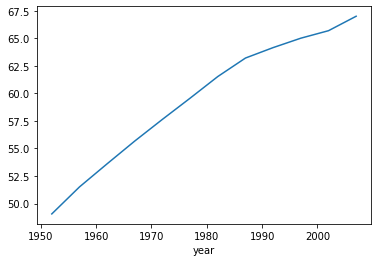

In [58]:
global_yearly_life.plot()
plt.show()

In [61]:
gapminder_df[gapminder_df['year'] == 1952]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053
...,...,...,...,...,...,...
1644,Vietnam,Asia,1952,40.412,26246839,605.066492
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
1668,"Yemen, Rep.",Asia,1952,32.548,4963829,781.717576
1680,Zambia,Africa,1952,42.038,2672000,1147.388831
